# High Altitude Mountain Sickness Analysis

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

## Loading the Dataset

In [10]:
df = pd.read_excel('High_Alt V10.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 7 columns):
Age                    4744 non-null float64
Height                 4768 non-null float64
Smoking                4768 non-null int64
Alcohol_consumption    4768 non-null int64
Gender                 4768 non-null object
Altitude               4768 non-null int64
AMS                    4768 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 260.9+ KB


In [12]:
df.describe()

,Age,Height,Smoking,Alcohol_consumption,Altitude,AMS
count,4744.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000
mean,24.750000,171.534186,1.902685,1.789430,7796.352978,0.524958
std,2.640187,2.469703,0.773600,0.766208,2056.624973,0.499429
min,18.000000,167.100000,1.000000,1.000000,4500.000000,0.000000
25%,24.000000,169.500000,1.000000,1.000000,6502.000000,0.000000
50%,25.000000,171.600000,2.000000,2.000000,6985.000000,1.000000
75%,27.000000,173.400000,3.000000,2.000000,9749.000000,1.000000
max,38.000000,176.000000,3.000000,3.000000,12012.000000,1.000000


# Data Visualization & Features Extraction

In [13]:
Le = preprocessing.LabelEncoder()
sex = Le.fit_transform(df['Gender'])
df['Sex'] = sex

## Corelation Matrix

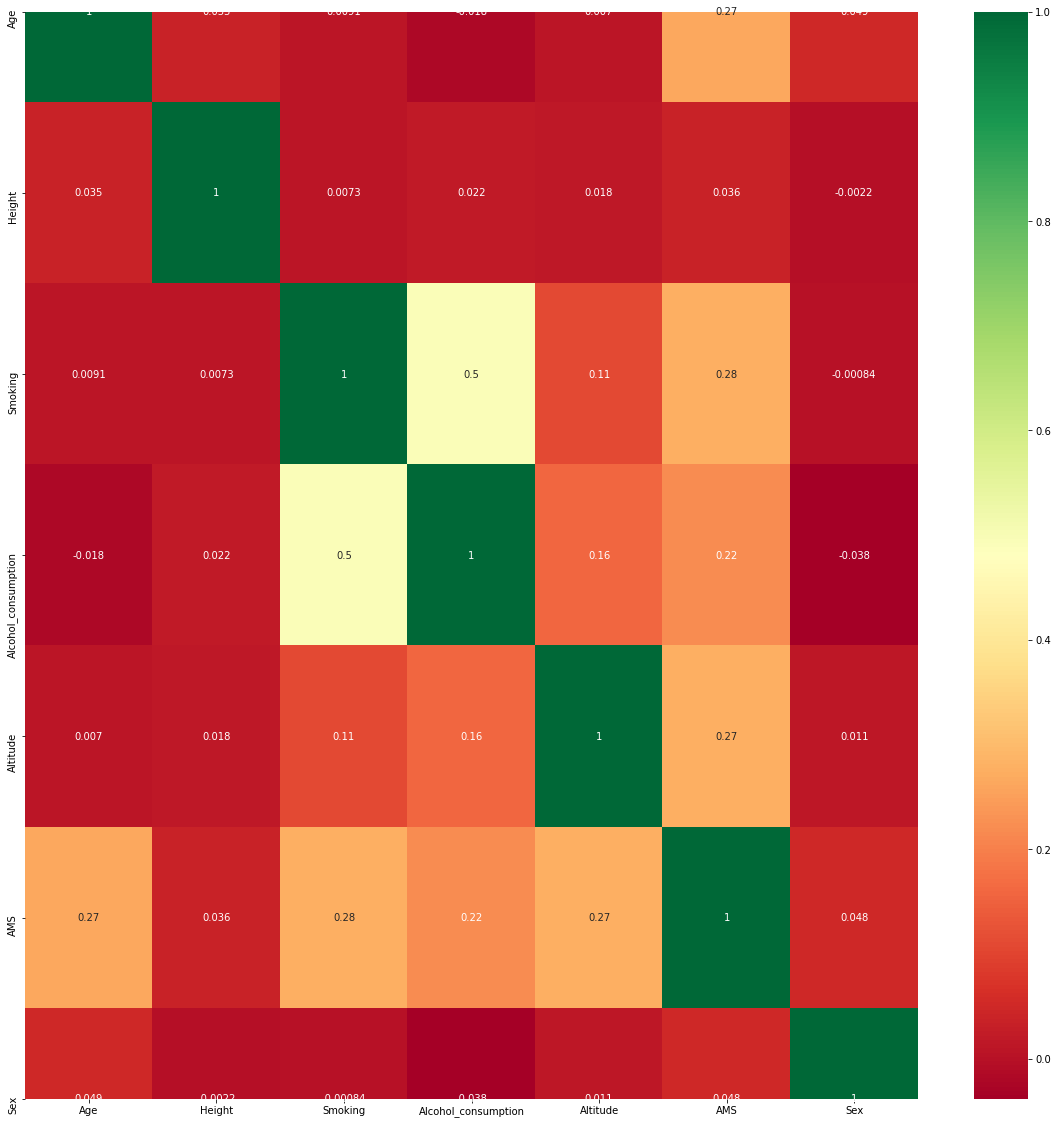

In [14]:
import seaborn as sns
corrmat = df.corr()
top_features = corrmat.index
plt.figure(figsize=(20,20))
hm = sns.heatmap(df[top_features].corr(), annot=True, cmap="RdYlGn")

## Distribution of Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000261A5169EF0>]],
      dtype=object)

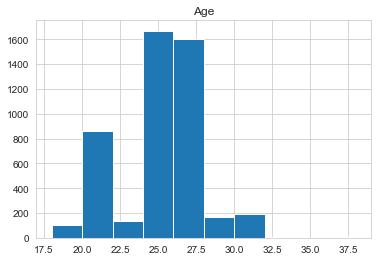

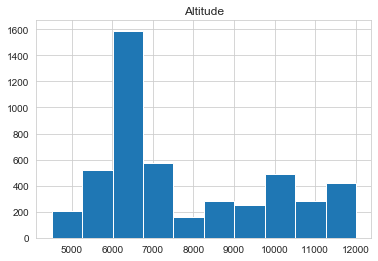

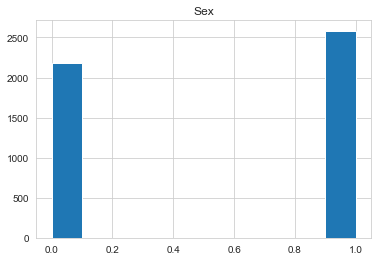

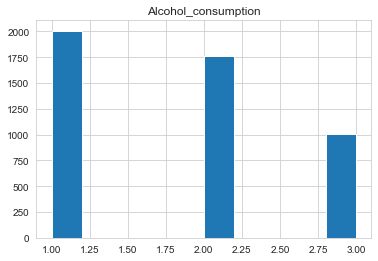

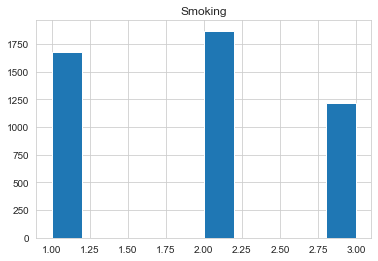

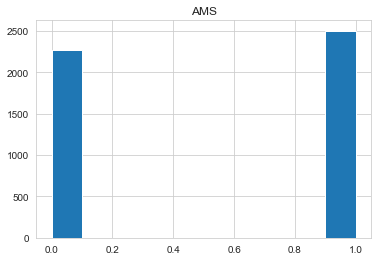

In [50]:
df.hist(column="Age")
df.hist(column="Altitude")
df.hist(column="Sex")
df.hist(column="Alcohol_consumption")
df.hist(column="Smoking")
df.hist(column="AMS")

## Distribution of dependent feature 

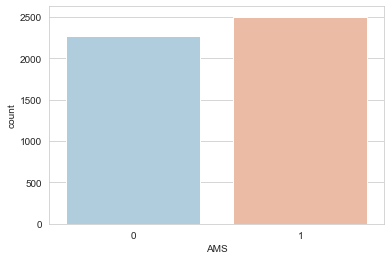

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='AMS', data=df, palette='RdBu_r')

# Data Preprocessing

## Hot Label Encoding of categorical features

In [15]:
dataset = pd.get_dummies(df, columns = ['Smoking', 'Alcohol_consumption'])
dataset.head()

,Age,Height,Gender,Altitude,AMS,Sex,Smoking_1,Smoking_2,Smoking_3,Alcohol_consumption_1,Alcohol_consumption_2,Alcohol_consumption_3
0,21.0,169.5,Male,10497,1,1,0,0,1,0,1,0
1,18.0,169.8,Male,5152,0,1,1,0,0,1,0,0
2,32.0,168.0,Male,11510,0,1,1,0,0,1,0,0
3,21.0,172.2,Male,5337,1,1,0,1,0,1,0,0
4,20.0,172.8,Male,6769,0,1,0,0,1,0,1,0


## Feature Scaling 

In [16]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
Cols = ['Age','Altitude']
dataset[Cols] = SS.fit_transform(dataset[Cols])
dataset[Cols] = dataset[Cols].astype('float32')
dataset.head()

,Age,Height,Gender,Altitude,AMS,Sex,Smoking_1,Smoking_2,Smoking_3,Alcohol_consumption_1,Alcohol_consumption_2,Alcohol_consumption_3
0,-1.420504,169.5,Male,1.313283,1,1,0,0,1,0,1,0
1,-2.556906,169.8,Male,-1.285908,0,1,1,0,0,1,0,0
2,2.746307,168.0,Male,1.805889,0,1,1,0,0,1,0,0
3,-1.420504,172.2,Male,-1.195945,1,1,0,1,0,1,0,0
4,-1.799304,172.8,Male,-0.499586,0,1,0,0,1,0,1,0


## Droping the unecessary features 

In [17]:
y = dataset['AMS']
x = dataset.drop(['AMS', 'Height','Gender'], axis = 1)
x['Age'] = x['Age'].fillna(x['Age'].mean())
#temp = x[x.isna().any(axis=1)]

## Function of Confusion Matrix for Evaluation of Models
True Positive:   Actual Value 1 Predicted 1 <br>
False Positive:  Actual Value 0 Predicted 1 <br>
True Negative:   Actual Value 0 Predicted 0 <br>
False Negative:  Actual Value 1 Predicted 0 <br>
Recall Accuracy: (TP) / (TP+FN)

In [54]:
from sklearn.metrics import confusion_matrix
def confusion_mat(x,y,model):
    v = []
    for i,row in x.iterrows():
        v.append(model.predict([[row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8]]]))
    tn, fn, fp, tp = confusion_matrix(v,y).ravel()
    print('Confusion Matrix Values:','TN:',tn,'FP:',fp)
    print('                         FN:',fn,' TP:',tp)
    print('Recall Accuracy:',(tp)/(tp+fn))

# Models
## 1. KNN


In [20]:
from sklearn.model_selection import cross_val_score
knn_score = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn,x,y,cv=150)
    knn_score.append(score.mean())

Text(0, 0.5, 'Cross Val. Scores')

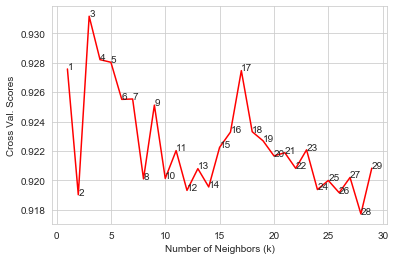

In [278]:
plt.plot([k for k in range(1, 30)], knn_score, color = 'red')
for i in range(1,30):
    plt.text(i, knn_score[i-1], (i))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross Val. Scores')

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
KNN_score = cross_val_score(knn,x,y,cv=150)
print(knn.score(x_test, y_test), KNN_score.mean())

0.9255765199161425 0.93114898989899


In [55]:
confusion_mat(x_test, y_test, knn)

Confusion Matrix Values: TN: 398 FP: 30
                         FN: 41  TP: 485
Recall Accuracy: 0.9220532319391636


## 2. Decision Tree

In [61]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(x_train, y_train)
DT_score = cross_val_score(DT,x,y,cv=150)
print(DT.score(x_test,y_test), DT_score.mean())

0.9371069182389937 0.9408459595959596


In [56]:
confusion_mat(x_test, y_test, DT)

Confusion Matrix Values: TN: 404 FP: 24
                         FN: 38  TP: 488
Recall Accuracy: 0.9277566539923955


## 3. Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
RF_score = []
for e in range(1,50):
    RF = RandomForestClassifier(n_estimators=e)
    score = cross_val_score(RF,x,y,cv=150)
    RF_score.append(score.mean())

Text(0, 0.5, 'Cross Val. Scores')

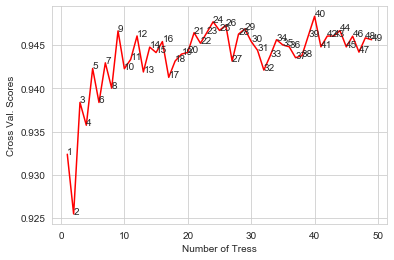

In [191]:
plt.plot([e for e in range(1,50)], RF_score, color = 'red')
for e in range(1,50):
    plt.text(e, RF_score[e-1], (e))
plt.xlabel('Number of Tress')
plt.ylabel('Cross Val. Scores')

In [27]:
RF = RandomForestClassifier(n_estimators = 40)
RF.fit(x_train,y_train)
RF_score = cross_val_score(RF,x,y,cv=150)
print(RF.score(x_test, y_test), RF_score.mean())

0.9433962264150944 0.9445707070707071


In [57]:
confusion_mat(x_test, y_test, RF)

Confusion Matrix Values: TN: 405 FP: 23
                         FN: 31  TP: 495
Recall Accuracy: 0.94106463878327


## 4. Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)
NB_score = cross_val_score(NB,x,y,cv=150)
print(NB.score(x_test,y_test), NB_score.mean())

0.8480083857442348 0.8569444444444446


In [58]:
confusion_mat(x_test, y_test, NB)

Confusion Matrix Values: TN: 387 FP: 41
                         FN: 104  TP: 422
Recall Accuracy: 0.8022813688212928


## 5. Combination Model

In [59]:
combine_prediction = []
for i,row in x_test.iterrows():
    inputs = [[row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8]]]
    #Taking the input from the test data predicting the output
    #Predicting the output using the decision tree model
    p1 = DT.predict(inputs)
    #Predicting the output using the Naive Bayes model
    p2 = NB.predict(inputs)
    #Predicting the output using the K-Nearest Neighbor model
    p3 = knn.predict(inputs)
    #Predicting the output using the Random forest model
    p4 = RF.predict(inputs)

    avgpred = [p1,p2,p3,p4]
    i1=0
    i0=0
    #calculating the majority
    for i in avgpred:
        if i==1:
            i1+=1
        if i==0:
            i0+=1
    # storing the majority result
    if i0 == 4:
        combine_prediction.append(0)
    else:
        combine_prediction.append(1)
tn, fn, fp, tp = confusion_matrix(combine_prediction,y_test).ravel()
print('Confusion Matrix Values:','TN:',tn,'FP:',fp)
print('                         FN:',fn,' TP:',tp)
print('Recall Accuracy:',(tp)/(tp+fn))

Confusion Matrix Values: TN: 363 FP: 65
                         FN: 18  TP: 508
Recall Accuracy: 0.9657794676806084
